1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

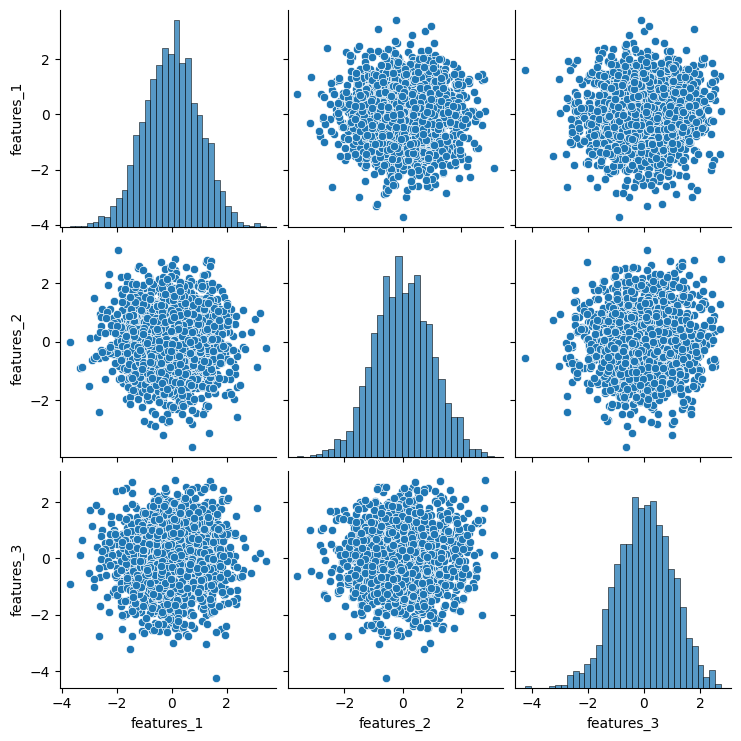

In [5]:
import pandas as pd
import csv
import seaborn as sns

file_name = 'data/regression_generated.csv'
data = pd.read_csv(file_name)

sns.pairplot(data, vars = ["features_1", "features_2", "features_3"])
#There is no correlation among those features

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

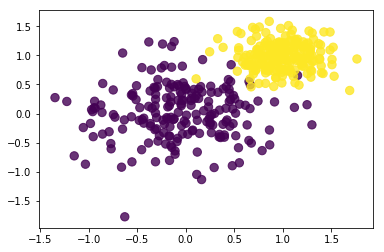

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

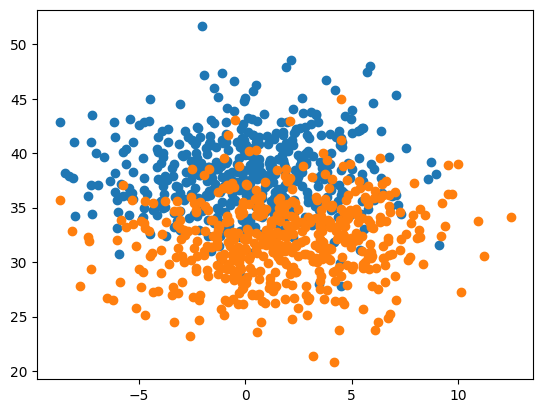

In [2]:
import pandas as pd
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

mean1 = [0, 38]
cov1 = [(12, .1), (.1, 12)]
data_x1, data_y1 = npr.multivariate_normal(mean=mean1, cov=cov1, size=500).T

mean2 = [2, 32]
cov2 = [(13, 2), (2, 13)]
data_x2, data_y2 = npr.multivariate_normal(mean=mean2, cov=cov2, size=500).T
index = npr.normal(0, 7, 500)

plt.scatter(data_x1, data_y1)
plt.scatter(data_x2, data_y2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

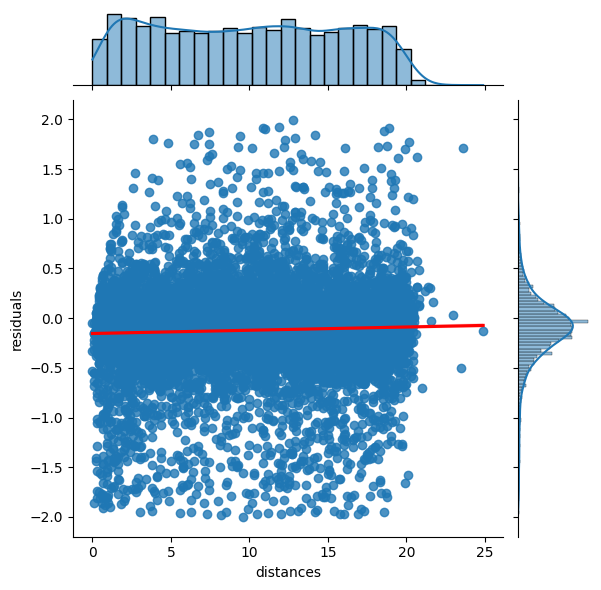

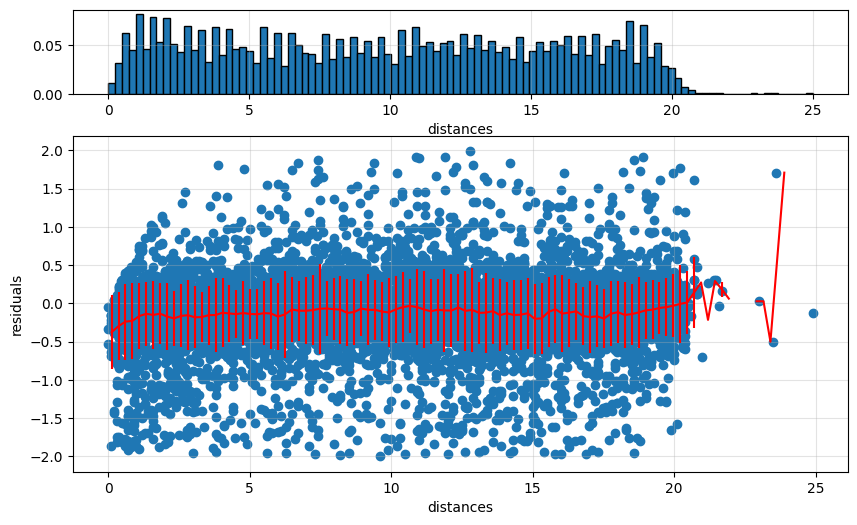

In [26]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)

df = pd.read_pickle(filename)
df_list = df.tolist()
df_list_residuals = df.tolist()['residuals']
df_pd = pd.DataFrame(df_list)


mask = abs(df_pd['residuals'])<2
df_mod = df_pd[mask]
df_mod
        
sns.jointplot(x="distances", y="residuals", data=df_mod, kind="reg", joint_kws={'line_kws':{'color':'r'}})
plt.show()
#There is almost no correlations between the two varaibles,
#since the regression line is almost horizontal

figure1, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,6), gridspec_kw={'height_ratios':[5, 20]})
num_bins = int(np.sqrt(len(df_mod['distances'])))
counts, bin_edges, _ = axs[0].hist(df_mod['distances'], bins=num_bins, range=(0, +25), density=True, cumulative=False, edgecolor='black')
axs[0].set_xlabel('distances')

x = np.array((bin_edges[:-1] + bin_edges[1:])/2) #centers of the bins

y = np.array([])
i = 0
for edge in bin_edges:
    if edge != 0:
        if i == 0:
            mask_edges = df_mod['distances'] < edge
            piece = df_mod.loc[mask_edges, 'residuals']
            mean = piece.mean()
            y = np.append(y, [mean])
            i = i+1
        else:
            mask_edges = (df_mod['distances']<edge) & (df_mod['distances']>bin_edges[i-1])
            piece = df_mod.loc[mask_edges, 'residuals']
            mean = piece.mean()
            y = np.append(y, [mean])
            i = i+1

err_y = np.array([])
for i in range(bin_edges.shape[0]):
    if i != 0:
        mask_err = (df_mod['distances']<bin_edges[i]) & (df_mod['distances']>bin_edges[i-1])
        piece = df_mod.loc[mask_err, 'residuals']
        err = np.std(piece)
        err_y = np.append(err_y, [err])
err_y.resize(len(y))

axs[1].scatter(x=df_mod['distances'], y=df_mod['residuals'])
axs[1].errorbar(x, y, yerr=err_y, c='r')

axs[0].grid(alpha=0.35)
axs[1].grid(alpha=0.35)

axs[1].set_ylabel('residuals')
axs[1].set_xlabel('distances')
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


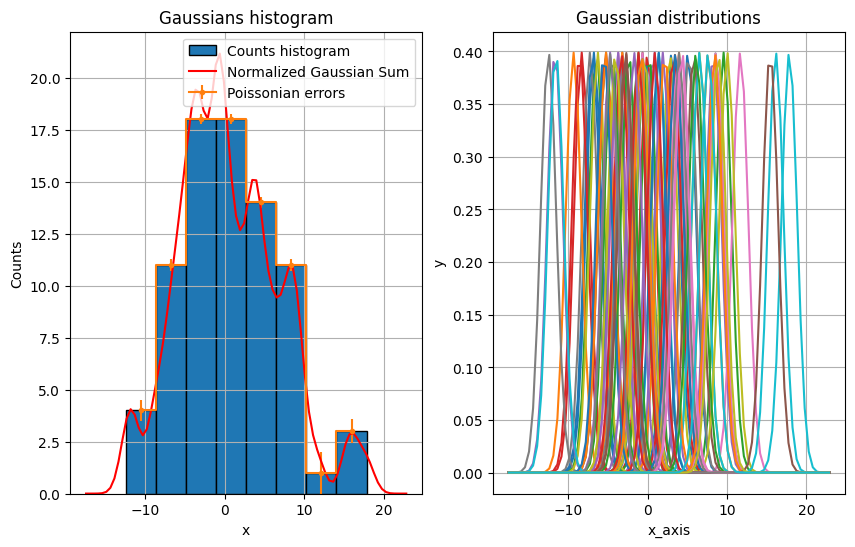

In [2]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
x = npr.normal(loc=0, scale=6., size=(80))
x_axis = np.linspace(x.min()-5, x.max()+5, len(x))
y = np.zeros((len(x), len(x)))
for j in range(len(x)):
    y[j, :] = norm.pdf(x_axis, loc=x[j])
    axs[1].plot(x_axis, y[j,:])

df = pd.DataFrame(y)

plt.subplot(1,2,1)

num_bins = int(np.sqrt(len(x)))
counts, bin_edges, _ = plt.hist(x, bins=num_bins, cumulative=False, label=('Counts histogram'), edgecolor='black')
axs[1].set_title('Gaussian distributions')
axs[1].set_xlabel('x_axis')
axs[1].set_ylabel('y')
axs[1].grid()

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(x=bin_centres, y=counts, yerr=1/(counts**0.5), marker='.', drawstyle='steps-mid', label=('Poissonian errors'))

means = (y.sum(axis=0))/len(x)

hist_integral = integrate.trapz(counts, bin_centres)
means_integral = integrate.trapz(means, x_axis)
normalized_values = means*(hist_integral/means_integral)

axs[0].plot(x_axis, normalized_values, c='r', label=('Normalized Gaussian Sum'))
axs[0].set_title('Gaussians histogram')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Counts')
axs[0].legend(loc='upper right')
axs[0].grid()
plt.show()


# 